# Pertemuan 10 - Pengujian dan Pengukuran Dataset

## Capaian Pembelajaran:
> 4.1: Mampu menguji dan mengukur karakteristik dataset, termasuk distribusi data, outliers, dan missing values menggunakan pustaka seperti Pandas, NumPy, dan lain-lain dalam bahasa pemrograman Python

## Pokok Bahasan
1. Analisis Dataset
2. Distribusi Data
3. Identifikasi Outliers
4. Penanganan Missing Values
5. Pengujian Dataset
6. Pengukuran Dataset
7. Early Stopping
8. Overfitting

## 1. Analisis Dataset
Analisis dataset adalah langkah penting dalam proses pemodelan data. Tujuannya adalah untuk memahami struktur, distribusi, dan karakteristik dataset, serta untuk mengidentifikasi masalah potensial yang perlu ditangani sebelum membangun model machine learning. Analisis dataset melibatkan beberapa langkah utama seperti eksplorasi data, visualisasi data, analisis statistik, dan penanganan data yang hilang atau tidak valid.

### Langkah-langkah Analisis Dataset
1. Eksplorasi Data (Data Exploration): Memahami Struktur Data: Melihat bentuk dan ukuran dataset, jenis fitur (numerik, kategorikal), dan tipe data. Melihat Data Sekilas: Menggunakan fungsi seperti head(), tail(), info(), dan describe() untuk melihat ringkasan dataset.
2. Visualisasi Data (Data Visualization): Visualisasi Distribusi: Menggunakan histogram, boxplot, dan density plot untuk melihat distribusi setiap fitur. Visualisasi Hubungan: Menggunakan scatter plot, pair plot, dan heatmap untuk melihat hubungan antara fitur. Visualisasi Kategori: Menggunakan bar plot dan count plot untuk melihat distribusi data kategorikal.
3. Analisis Statistik: Statistik Deskriptif: Menghitung statistik deskriptif seperti mean, median, modus, standar deviasi, dan korelasi. Uji Hipotesis: Menggunakan uji statistik seperti uji t, uji chi-square, dan ANOVA untuk memahami hubungan antara fitur.
4. Penanganan Data yang Hilang dan Tidak Valid: Mengidentifikasi Missing Values: Melihat jumlah dan distribusi nilai yang hilang. Mengimputasi Missing Values: Mengisi nilai yang hilang dengan mean, median, modus, atau menggunakan teknik imputasi lanjutan. Mengidentifikasi dan Mengatasi Outliers: Menggunakan teknik statistik dan visualisasi untuk mengidentifikasi dan menangani outliers.
5. Feature Engineering: Membuat Fitur Baru: Membuat fitur baru yang dapat membantu model memahami data dengan lebih baik Normalisasi dan Standarisasi: Mengubah skala fitur untuk memastikan model bekerja dengan baik.

### Contoh Implementasi Analisis Dataset

Shape of the dataset: (9, 4)

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   9 non-null      int64 
 1   Age     9 non-null      int64 
 2   Income  9 non-null      int64 
 3   Gender  9 non-null      object
dtypes: int64(3), object(1)
memory usage: 420.0+ bytes
None

First few rows of the dataset:
   Index  Age  Income  Gender
0      0   25   50000    Male
1      1   30   60000  Female
2      2   35   70000    Male
3      3   20   45000    Male
4      4   35   30000    Male

Statistical summary of the dataset:
          Index        Age        Income
count  9.000000   9.000000      9.000000
mean   4.000000  31.666667  57222.222222
std    2.738613   7.905694  15833.333333
min    0.000000  20.000000  30000.000000
25%    2.000000  25.000000  45000.000000
50%    4.000000  30.000000  60000.000000
75%    6.000000  35.000000  70000.

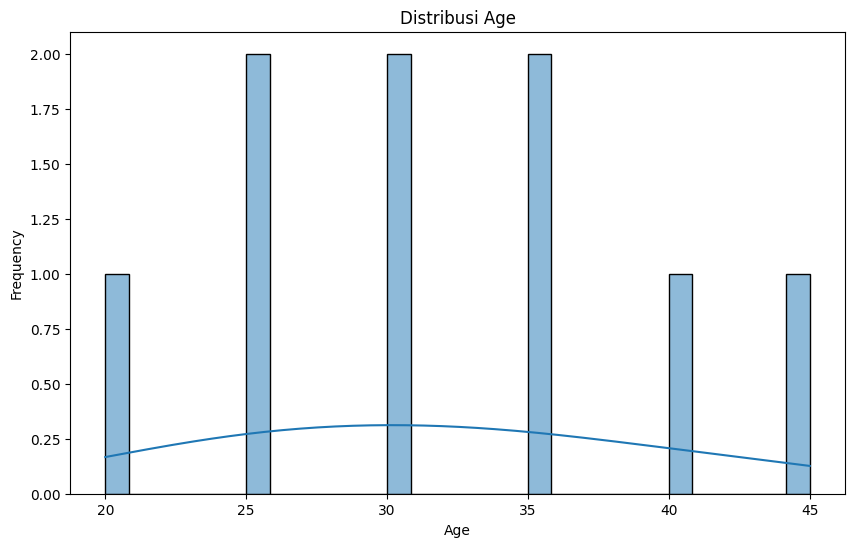

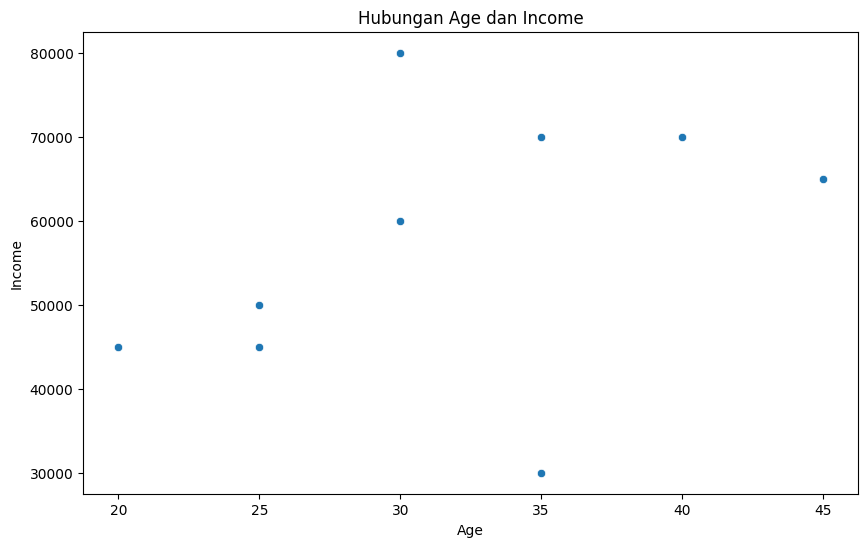

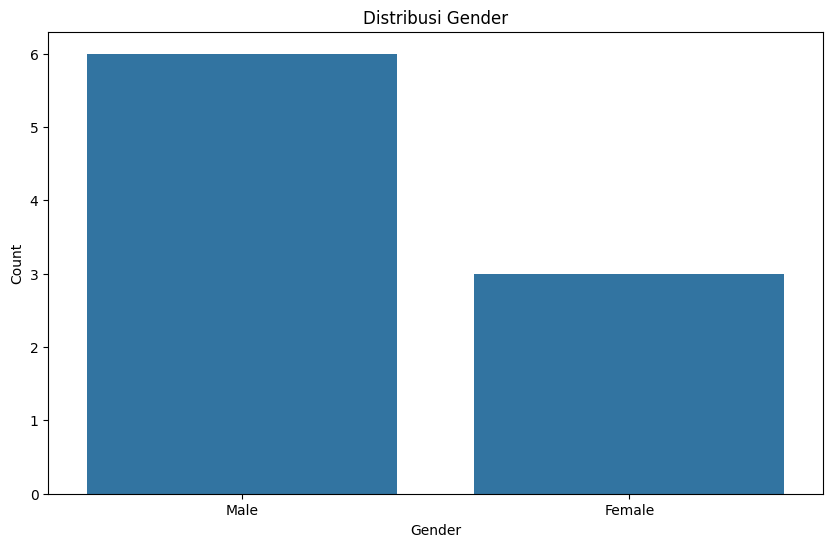


Correlation matrix:
           Index       Age    Income
Index   1.000000  0.259808  0.259448
Age     0.259808  1.000000  0.391124
Income  0.259448  0.391124  1.000000

Missing values in each column:
Index     0
Age       0
Income    0
Gender    0
dtype: int64


<ipython-input-3-cf3a3eb2198b>:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-3-cf3a3eb2198b>:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

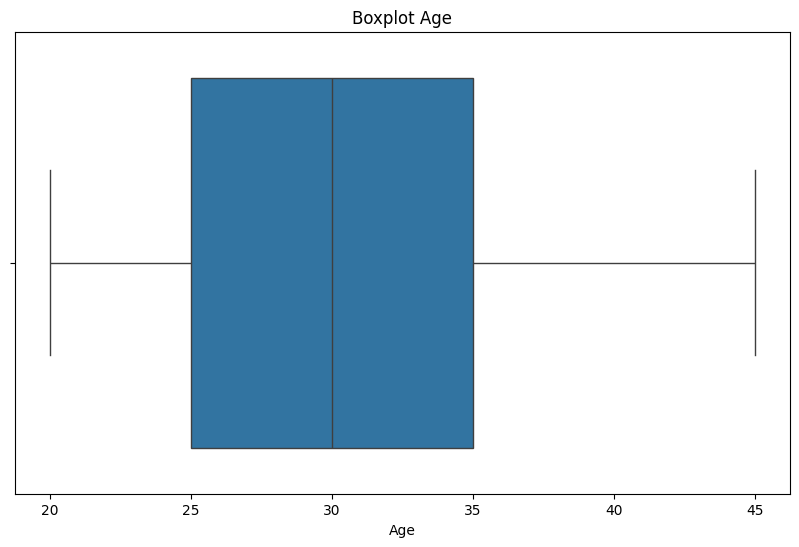


First few rows of the dataset after preprocessing:
   Index       Age    Income  Gender  Age_Income_Ratio
0      0 -0.894427 -0.483810    Male          1.848716
1      1 -0.223607  0.186081  Female         -1.201666
2      2  0.447214  0.855971    Male          0.522463
3      3 -1.565248 -0.818755    Male          1.911741
4      4  0.447214 -1.823591    Male         -0.245238


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Membaca dataset
df = pd.read_csv('data1.csv', sep=';')

# Melihat struktur data
print("Shape of the dataset:", df.shape)
print("\nInfo about the dataset:")
print(df.info())

# Melihat data sekilas
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nStatistical summary of the dataset:")
print(df.describe())

# Visualisasi distribusi
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualisasi hubungan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Hubungan Age dan Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Visualisasi kategori
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Analisis statistik
print("\nCorrelation matrix:")
print(df.select_dtypes(include=[np.number]).corr())

# Mengidentifikasi missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Mengimputasi missing values dengan mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Mengidentifikasi outliers dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot Age')
plt.xlabel('Age')
plt.show()

# Normalisasi fitur numerik
scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

# Membuat fitur baru
df['Age_Income_Ratio'] = df['Age'] / df['Income']

# Melihat data setelah preprocessing
print("\nFirst few rows of the dataset after preprocessing:")
print(df.head())


## 2. Distribusi Data
Distribusi data mengacu pada cara nilai-nilai dalam dataset tersebar atau terdistribusi di sepanjang rentang nilainya. Memahami distribusi data penting dalam analisis statistik karena dapat memberikan wawasan tentang karakteristik data seperti pusat data (mean, median), sebaran data (deviasi standar), serta kecenderungan atau anomali dalam data.

### Jenis Distribusi Data
#### a. Distribusi Normal (Gaussian)
Distribusi normal adalah distribusi simetris di sekitar mean, di mana sebagian besar nilai berpusat di sekitar mean dengan sedikit nilai yang tersebar di kedua ekstrem. Contoh: Tinggi badan manusia, berat badan dalam populasi tertentu.
![Normal_Distribution_PDF.svg.png](attachment:Normal_Distribution_PDF.svg.png)


#### b. Distribusi Uniform
Distribusi uniform terjadi ketika setiap nilai dalam rentang memiliki probabilitas yang sama untuk muncul, sehingga bentuknya menjadi persegi atau datar. Contoh: Hasil dari pelemparan koin (nilai 0 atau 1), atau hasil pelemparan dadu (nilai 1 hingga 6).
![Uniform_Distribution_PDF_SVG.svg.png](attachment:Uniform_Distribution_PDF_SVG.svg.png)


#### c. Distribusi Binomial
Distribusi binomial muncul ketika ada dua hasil yang mungkin dari suatu percobaan (berhasil atau gagal), dengan sejumlah percobaan yang tetap. Contoh: Hasil dari serangkaian percobaan yang terdiri dari dua kemungkinan hasil (misalnya, hasil ujian dengan jawaban benar atau salah).
![Binomial Distribution](Binomial_distribution_pmf.svg.png)


#### d. Distribusi Poisson
Distribusi Poisson digunakan untuk menggambarkan jumlah peristiwa yang terjadi dalam interval waktu atau ruang tertentu, dengan angka rata-rata kejadian yang diketahui dan independen dari waktu sebelumnya. Contoh: Jumlah panggilan ke pusat layanan pelanggan dalam satu jam.
![Poisson_pmf.svg.png](attachment:Poisson_pmf.svg.png)
____

#### Mengidentifikasi Distribusi Data
Untuk mengidentifikasi distribusi data, Anda dapat menggunakan beberapa teknik berikut:

#### a. Histogram
Digunakan untuk melihat distribusi data numerik dengan membagi rentang nilai menjadi beberapa interval dan menghitung jumlah observasi di setiap interval.

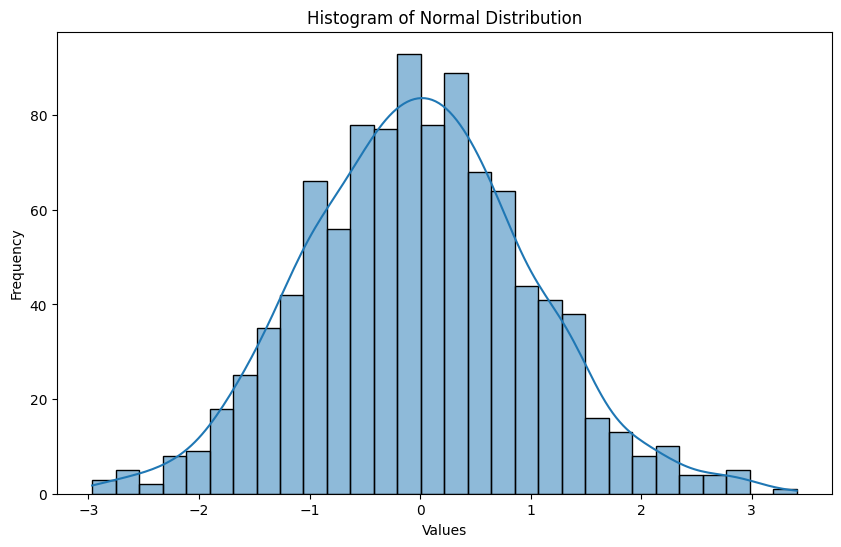

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate data from a normal distribution
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_normal, bins=30, kde=True)
plt.title('Histogram of Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


#### b. Density Plot
Mirip dengan histogram, tetapi menggunakan kurva kernel (kernel density estimation, KDE) untuk menunjukkan distribusi data secara kontinu.

<ipython-input-5-08b2a097c5ff>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_normal, shade=True)


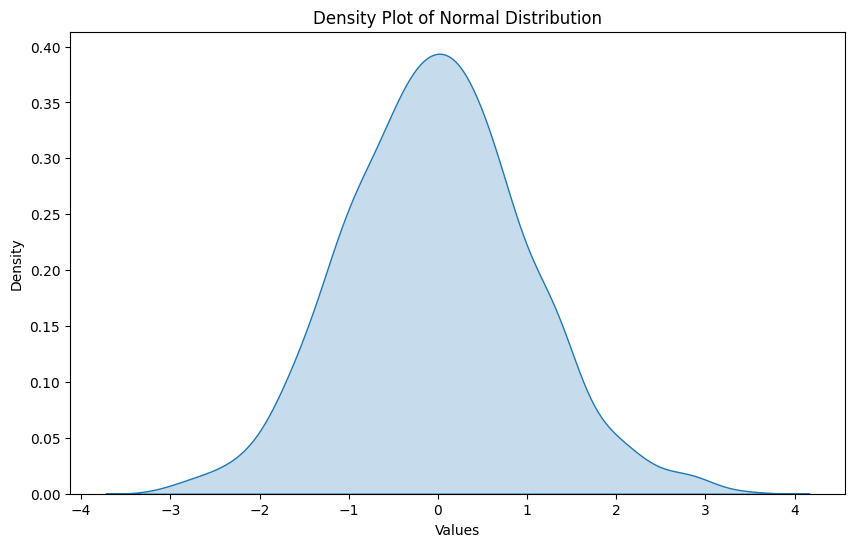

In [5]:
# Plot density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data_normal, shade=True)
plt.title('Density Plot of Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()


#### c. Boxplot
Boxplot Digunakan untuk melihat distribusi data serta mengidentifikasi outlier.

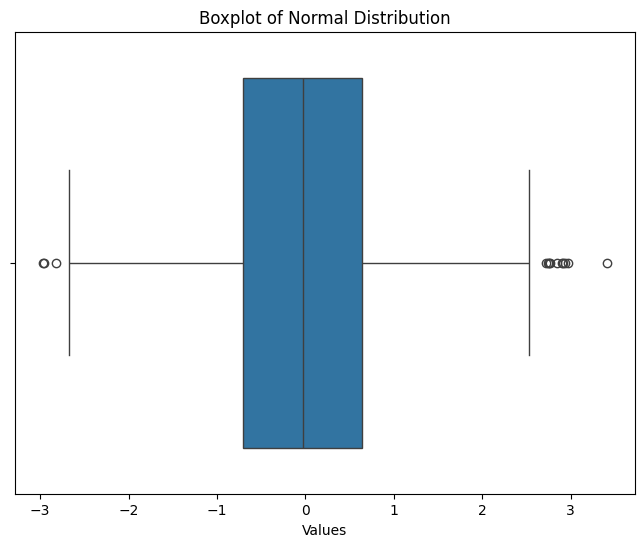

In [6]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_normal)
plt.title('Boxplot of Normal Distribution')
plt.xlabel('Values')
plt.show()

Memahami distribusi data adalah langkah kunci dalam analisis data, karena memungkinkan kita untuk mengidentifikasi pola, anomali, dan kecenderungan yang ada dalam dataset. Dengan memilih metode visualisasi yang tepat, seperti histogram, density plot, atau boxplot, Anda dapat mendapatkan wawasan yang lebih dalam tentang bagaimana data didistribusikan dan menentukan langkah-langkah selanjutnya dalam analisis atau pemodelan data.

## 3. Identifikasi Outliers
Outliers adalah nilai-nilai dalam dataset yang berada jauh dari sebagian besar nilai lainnya. Mereka dapat menunjukkan kesalahan data, variabilitas yang luar biasa, atau poin data yang sangat berbeda. Mengidentifikasi outliers penting karena mereka dapat sangat mempengaruhi analisis statistik dan model machine learning.

#### Mengapa Outliers Penting?
- Pengaruh pada Statistik: Outliers dapat mempengaruhi mean, standard deviation, dan nilai lainnya.
- Pengaruh pada Model Machine Learning: Outliers dapat mengurangi akurasi model dengan membuat model overfit atau underfit.
- Kesalahan Pengukuran: Outliers bisa menjadi indikator adanya kesalahan dalam proses pengumpulan data.

#### Metode untuk Mengidentifikasi Outliers
##### Visualisasi Data
- Boxplot: Menampilkan data berdasarkan kuartil. Outliers biasanya terlihat sebagai titik-titik yang terpisah dari box.
- Scatter Plot: Berguna untuk data dua dimensi, outliers terlihat sebagai titik yang jauh dari pola umum data.
- Histogram: Membantu melihat distribusi data dan mengidentifikasi nilai yang berada jauh dari distribusi normal.

##### Metode Statistik
- IQR (Interquartile Range): Nilai yang berada di bawah Q1 - 1.5IQR atau di atas Q3 + 1.5IQR dianggap sebagai outliers.
- Z-Score: Menunjukkan seberapa jauh nilai dari mean. Biasanya, nilai dengan z-score di atas 3 atau di bawah -3 dianggap sebagai outliers.

#### Contoh Implementasi Identifikasi Outliers

    Age  Income
0    25   50000
1    30   80000
2    35   60000
3    40   70000
4   100  200000
5    45   75000
6    50   80000
7    25   50000
8    30   80000
9    35   60000
10   40   70000
11   45   75000
12   50   80000
13  150  300000


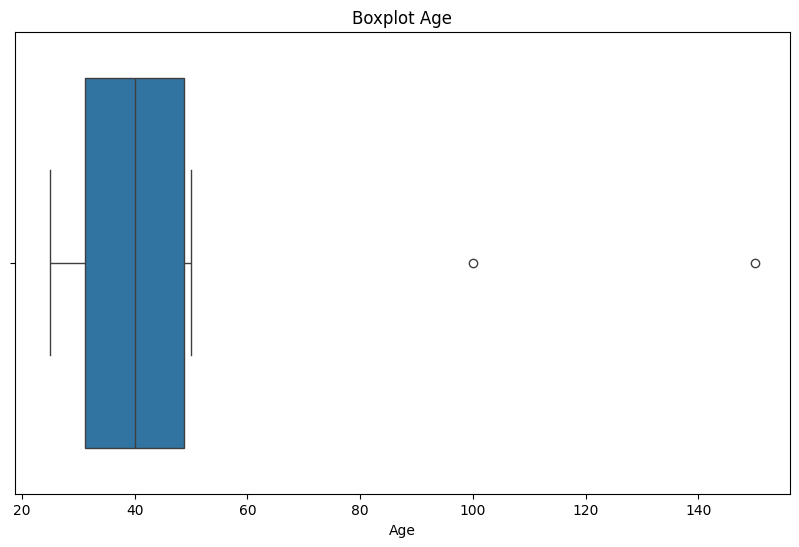

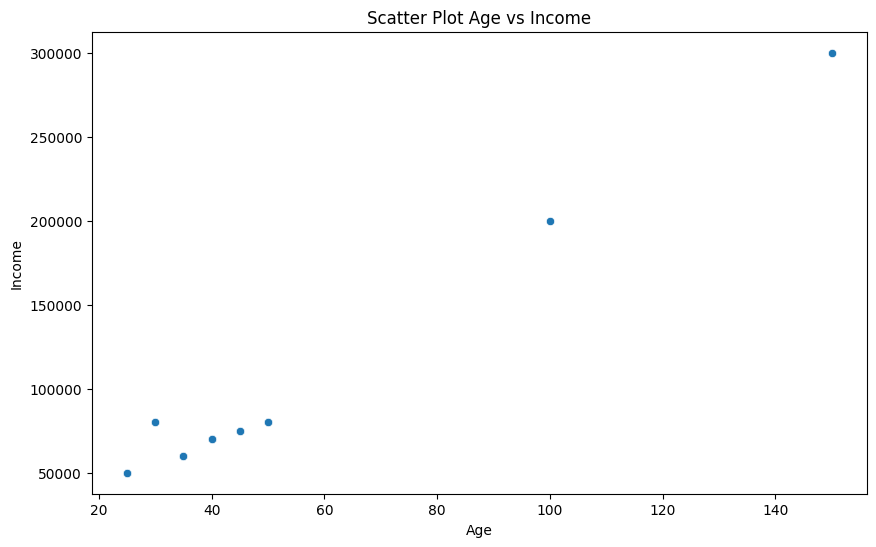


Outliers berdasarkan IQR:
    Age  Income
4   100  200000
13  150  300000

Outliers berdasarkan Z-Score:
    Age  Income
13  150  300000


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat data sampel
data = {
    'Age': [25, 30, 35, 40, 100, 45, 50, 25, 30, 35, 40, 45, 50, 150],
    'Income': [50000, 80000, 60000, 70000, 200000, 75000, 80000, 50000, 80000, 60000, 70000, 75000, 80000, 300000]
}

# Membuat dataframe
df = pd.DataFrame(data)

# Menampilkan data
print(df)

# Visualisasi Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot Age')
plt.xlabel('Age')
plt.show()

# Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Scatter Plot Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Identifikasi Outliers dengan IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print("\nOutliers berdasarkan IQR:")
print(outliers_IQR)

# Identifikasi Outliers dengan Z-Score
from scipy import stats

z_scores = np.abs(stats.zscore(df['Age']))
outliers_z = df[(z_scores > 3)]
print("\nOutliers berdasarkan Z-Score:")
print(outliers_z)


#### Penjelasan Coding
1. Boxplot: Boxplot menunjukkan distribusi Age dan outliers sebagai titik-titik di luar garis whisker.
2. Scatter Plot: Scatter plot menunjukkan hubungan antara Age dan Income dan memungkinkan identifikasi outliers berdasarkan penyimpangan dari pola umum.
3. IQR: Menghitung IQR untuk Age, kemudian menentukan nilai-nilai yang berada di luar Q1 - 1.5IQR dan Q3 + 1.5IQR sebagai outliers.
4. Z-Score: Menghitung z-score untuk Age dan menentukan nilai-nilai dengan z-score lebih besar dari 3 atau kurang dari -3 sebagai outliers.

Outliers yang diidentifikasi dengan metode IQR dan z-score mungkin berbeda tergantung pada distribusi data. Dengan menggunakan kombinasi metode ini, Anda dapat memperoleh pemahaman yang lebih komprehensif tentang outliers dalam dataset Anda.

## 4. Penanganan Missing Values
Penanganan missing values adalah langkah penting dalam preprocessing data. Data yang hilang dapat menyebabkan bias dalam analisis dan model machine learning, sehingga perlu ditangani dengan benar. Berikut adalah beberapa teknik umum untuk menangani missing values beserta contohnya:

#### Teknik Penanganan Missing Values

##### a. Menghapus Missing Values
- Jika jumlah missing values kecil dan tidak signifikan, data yang hilang dapat dihapus.
- df.dropna() menghapus semua baris yang memiliki missing values.
- df.dropna(axis=1) menghapus semua kolom yang memiliki missing values.

##### b. Mengisi Missing Values
Mean/Median/Mode Imputation: Mengisi missing values dengan mean, median, atau mode dari kolom tersebut.
- df['column'].fillna(df['column'].mean(), inplace=True)
- df['column'].fillna(df['column'].median(), inplace=True)
- df['column'].fillna(df['column'].mode()[0], inplace=True)

Forward Fill (ffill): Mengisi missing values dengan nilai sebelumnya.
- df.fillna(method='ffill', inplace=True)

Backward Fill (bfill): Mengisi missing values dengan nilai setelahnya.
- df.fillna(method='bfill', inplace=True)

Interpolate: Mengisi missing values dengan interpolasi linear.
- df.interpolate(method='linear', inplace=True)

Menggunakan Model Prediktif
  Menggunakan model machine learning untuk memprediksi missing values berdasarkan fitur lain.

```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['column']] = imputer.fit_transform(df[['column']])

##### Contoh Implementasi

In [8]:
import pandas as pd
import numpy as np

# Membuat data sampel dengan missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, np.nan, 35, 45, np.nan],
    'Income': [50000, 60000, np.nan, 80000, 90000],
    'Gender': ['F', 'M', np.nan, 'M', 'F']
}

# Membuat dataframe
df = pd.DataFrame(data)

# Menampilkan data
print("Original DataFrame:")
print(df)

# Menghapus baris dengan missing values
df_dropna = df.dropna()
print("\nDataFrame setelah menghapus baris dengan missing values:")
print(df_dropna)

# Mengisi missing values dengan mean (untuk kolom numerik)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)
print("\nDataFrame setelah mengisi missing values dengan mean:")
print(df)

# Mengisi missing values dengan mode (untuk kolom kategorikal)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
print("\nDataFrame setelah mengisi missing values dengan mode:")
print(df)

# Mengisi missing values dengan metode forward fill
df_ffill = df.fillna(method='ffill')
print("\nDataFrame setelah mengisi missing values dengan forward fill:")
print(df_ffill)

# Mengisi missing values dengan metode backward fill
df_bfill = df.fillna(method='bfill')
print("\nDataFrame setelah mengisi missing values dengan backward fill:")
print(df_bfill)

# Mengisi missing values dengan interpolasi
df_interpolate = df.interpolate(method='linear')
print("\nDataFrame setelah mengisi missing values dengan interpolasi:")
print(df_interpolate)


Original DataFrame:
      Name   Age   Income Gender
0    Alice  25.0  50000.0      F
1      Bob   NaN  60000.0      M
2  Charlie  35.0      NaN    NaN
3    David  45.0  80000.0      M
4      Eve   NaN  90000.0      F

DataFrame setelah menghapus baris dengan missing values:
    Name   Age   Income Gender
0  Alice  25.0  50000.0      F
3  David  45.0  80000.0      M

DataFrame setelah mengisi missing values dengan mean:
      Name   Age   Income Gender
0    Alice  25.0  50000.0      F
1      Bob  35.0  60000.0      M
2  Charlie  35.0  70000.0    NaN
3    David  45.0  80000.0      M
4      Eve  35.0  90000.0      F

DataFrame setelah mengisi missing values dengan mode:
      Name   Age   Income Gender
0    Alice  25.0  50000.0      F
1      Bob  35.0  60000.0      M
2  Charlie  35.0  70000.0      F
3    David  45.0  80000.0      M
4      Eve  35.0  90000.0      F

DataFrame setelah mengisi missing values dengan forward fill:
      Name   Age   Income Gender
0    Alice  25.0  50000.0    

<ipython-input-8-96a7ade40086>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-8-96a7ade40086>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## 5. Pengujian Dataset
Pengujian dataset adalah langkah penting dalam alur kerja analisis data dan machine learning. Ini mencakup eksplorasi awal untuk memahami struktur data, pemeriksaan konsistensi dan integritas, serta evaluasi kinerja model terhadap data tersebut. Berikut adalah beberapa langkah dan teknik yang digunakan dalam pengujian dataset. Langkah-langkah Pengujian Dataset:

### a. Eksplorasi Data (Data Exploration)
Memahami Struktur Data: Mengidentifikasi tipe data, jumlah fitur, dan baris. Statistik Deskriptif: Menggunakan statistik deskriptif untuk mendapatkan wawasan awal tentang data. Visualisasi Data: Menggunakan berbagai plot untuk memahami distribusi dan hubungan antar variabel.

### b. Pembersihan Data (Data Cleaning)
Menangani Missing Values: Mengisi atau menghapus data yang hilang. Mengidentifikasi dan Menghapus Outliers: Menggunakan teknik statistik dan visualisasi untuk mengidentifikasi outliers. Menghapus Duplikat: Menghapus baris yang duplikat untuk memastikan integritas data.

### c. Transformasi Data (Data Transformation)
Normalisasi/Standarisasi Data: Mengubah skala data sehingga berada dalam rentang tertentu atau memiliki distribusi normal Mengubah Data Kategorikal ke Numerik: Menggunakan teknik seperti one-hot encoding atau label encoding.

### d. Splitting Dataset
Train-Test Split: Memisahkan dataset menjadi set pelatihan dan pengujian untuk mengevaluasi kinerja model. K-Fold Cross-Validation: Membagi dataset menjadi beberapa bagian untuk validasi silang.

### e. Evaluasi Model
Metrik Evaluasi: Menggunakan metrik seperti accuracy, precision, recall, F1 score, dan ROC-AUC untuk mengevaluasi model Confusion Matrix: Menyediakan visualisasi performa model dalam klasifikasi.

Original DataFrame:
   Age  Income  Gender Purchased
0   25   50000    Male        No
1   30   80000  Female       Yes
2   35   60000    Male        No
3   40   70000  Female       Yes
4  100  200000  Female       Yes

Statistical summary of the dataset:
              Age         Income
count   14.000000      14.000000
mean    50.000000   95000.000000
std     34.250211   69337.524528
min     25.000000   50000.000000
25%     31.250000   62500.000000
50%     40.000000   75000.000000
75%     48.750000   80000.000000
max    150.000000  300000.000000


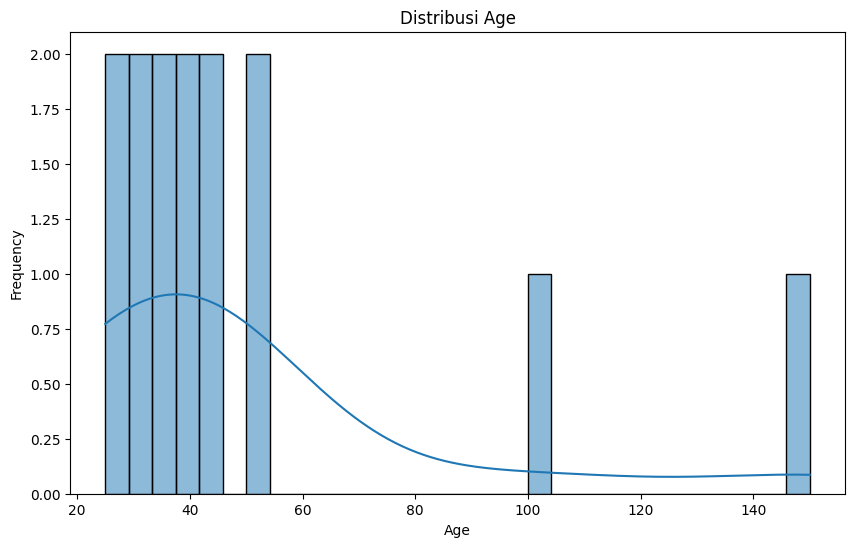

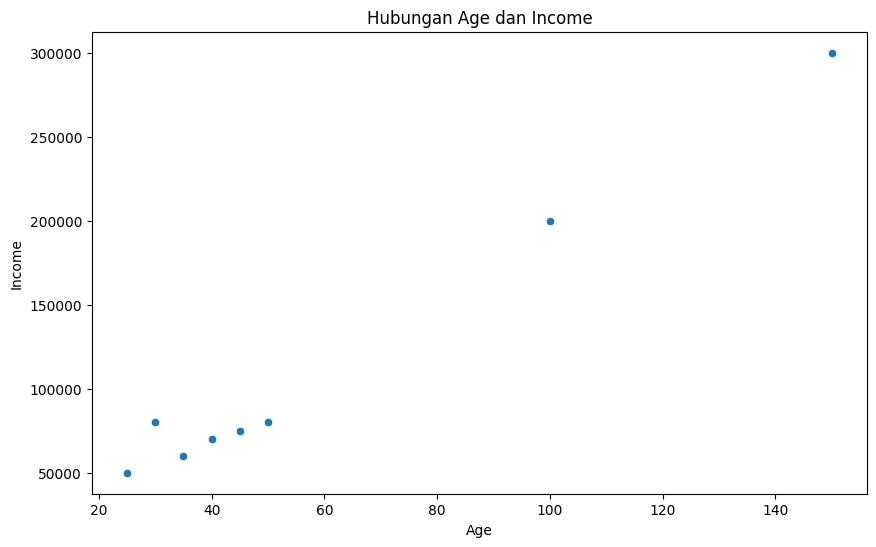

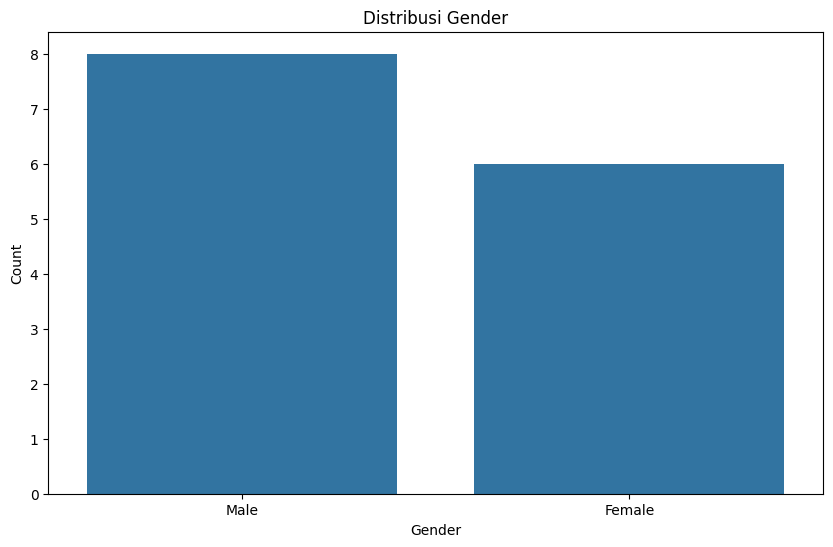


Model Performance:
Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
[[1 1]
 [0 1]]


<ipython-input-9-f521774bd6c7>:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-9-f521774bd6c7>:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [9]:
# Contoh Implementasi Pengujian Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Membuat data sampel
data = {
    'Age': [25, 30, 35, 40, 100, 45, 50, 25, 30, 35, 40, 45, 50, 150],
    'Income': [50000, 80000, 60000, 70000, 200000, 75000, 80000, 50000, 80000, 60000, 70000, 75000, 80000, 300000],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'Purchased': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

# Membuat dataframe
df = pd.DataFrame(data)

# Menampilkan data sekilas
print("Original DataFrame:")
print(df.head())

# Eksplorasi Data
print("\nStatistical summary of the dataset:")
print(df.describe())

# Visualisasi Data
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Hubungan Age dan Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Menangani Missing Values dan Outliers
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

# Transformasi Data
X = df[['Age', 'Income', 'Gender']]
y = df['Purchased']

# Mengubah Data Kategorikal ke Numerik
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Gender'])], remainder='passthrough')
X = ct.fit_transform(X)

# Normalisasi Data
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training Model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Prediksi
y_pred = classifier.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
cm = confusion_matrix(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)


## 6. Pengukuran Dataset
Pengukuran dataset adalah proses penting dalam memahami karakteristik dan kualitas data yang kita miliki. Ini melibatkan berbagai langkah untuk mengevaluasi dan memahami struktur, distribusi, serta hubungan antar variabel dalam dataset. Berikut ini adalah langkah-langkah yang biasanya dilakukan dalam pengukuran dataset:

#### a. Memahami Struktur Data
Langkah pertama adalah memahami struktur dataset, termasuk jumlah baris dan kolom, tipe data dari setiap kolom, dan melihat beberapa baris pertama untuk mendapatkan gambaran umum.

#### b. Statistik Deskriptif
Statistik deskriptif memberikan ringkasan kuantitatif tentang data. Ini termasuk mean, median, standar deviasi, minimum, maksimum, dan kuartil. Statistik deskriptif membantu dalam memahami distribusi data.

#### c. Visualisasi Data
Visualisasi data adalah cara efektif untuk melihat distribusi, pola, dan hubungan dalam data. Beberapa visualisasi umum termasuk histogram, box plot, scatter plot, dan heatmap.

#### d. Identifikasi Missing Values
Mengecek missing values penting untuk memahami kualitas data. Ini termasuk menghitung jumlah missing values di setiap kolom.

#### e. Identifikasi Outliers
Outliers dapat mempengaruhi analisis data dan model machine learning. Mengidentifikasi outliers dapat dilakukan dengan box plot atau metode statistik lainnya.

## 7. Early Stopping
Early stopping adalah teknik regulasi yang digunakan untuk mencegah overfitting dalam training model machine learning, terutama dalam neural networks dan gradient boosting models. Teknik ini memonitor performa model pada validation set selama training dan menghentikan training ketika performa pada validation set mulai menurun, meskipun performa pada training set masih meningkat. Tujuan utama dari early stopping adalah untuk menemukan titik optimal di mana model tidak lagi meningkatkan kemampuannya untuk generalisasi ke data baru, tetapi malah mulai overfit terhadap data training. Dengan menghentikan training pada titik ini, model diharapkan akan memiliki performa terbaik ketika diaplikasikan ke data baru yang tidak terlihat sebelumnya. Early stopping dapat diimplementasikan dengan berbagai framework machine learning seperti TensorFlow/Keras dan Scikit-learn. Berikut adalah contoh implementasi early stopping dengan Keras dan Scikit-learn.

In [10]:
# Contoh Implementasi dengan Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Membuat data sampel
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.rand(200, 20)
y_val = np.random.randint(2, size=(200, 1))

# Membangun model sederhana
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menggunakan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Menampilkan ringkasan model
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4799 - loss: 0.7046 - val_accuracy: 0.5500 - val_loss: 0.6864
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5453 - loss: 0.6907 - val_accuracy: 0.5300 - val_loss: 0.6935
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5533 - loss: 0.6859 - val_accuracy: 0.5250 - val_loss: 0.6896
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5624 - loss: 0.6812 - val_accuracy: 0.4850 - val_loss: 0.7027
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5731 - loss: 0.6787 - val_accuracy: 0.5100 - val_loss: 0.6941
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5637 - loss: 0.6782 - val_accuracy: 0.5150 - val_loss: 0.7010


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,709 (65.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,140 (43.52 KB)

None


In [ ]:
# Contoh Implementasi dengan Scikit-learn
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Membuat data sampel
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model dengan early stopping
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, validation_fraction=0.2, n_iter_no_change=10)

# Melatih model
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Early stopping adalah teknik regulasi yang efektif untuk mencegah overfitting dalam training model machine learning. Dengan menghentikan training pada saat yang tepat, model dapat mencapai generalisasi yang lebih baik pada data baru. Implementasinya mudah dilakukan dengan menggunakan framework seperti Keras dan Scikit-learn.

## 8. Overfitting
Overfitting adalah fenomena dalam machine learning di mana model belajar terlalu banyak detail dan noise dari data training, sehingga performanya sangat baik pada data training tetapi buruk pada data baru atau data uji (test data). Model overfit memiliki kompleksitas tinggi dan cenderung mengikuti data training terlalu ketat.

### Penyebab Overfitting
- Model Terlalu Kompleks: Model dengan terlalu banyak parameter atau layer cenderung overfit, terutama jika datanya tidak cukup besar untuk mendukung kompleksitas tersebut.
- Data Terbatas: Ketika data training tidak cukup banyak atau tidak cukup bervariasi, model dapat menangkap noise dan outliers sebagai pola penting.
- Training Terlalu Lama: Melatih model terlalu lama tanpa mekanisme regulasi dapat menyebabkan model overfit karena ia akan terus mengoptimalkan dirinya untuk data training.
- Fitur Tidak Relevan: Menggunakan terlalu banyak fitur yang tidak relevan atau sangat berkorelasi dapat menyebabkan overfitting.

### Dampak Overfitting
- Generalization Error: Model tidak mampu generalisasi dengan baik ke data baru, sehingga performa di dunia nyata menjadi buruk.
- Kurang Robust: Model menjadi tidak stabil dan sensitif terhadap data baru atau sedikit perubahan dalam data.

### Cara Mengatasi Overfitting
- Regularisasi: Menambahkan penalti terhadap kompleksitas model dalam fungsi loss, seperti L1 (Lasso) dan L2 (Ridge) regularization.
- Cross-Validation: Menggunakan teknik seperti k-fold cross-validation untuk memastikan model tidak hanya perform baik pada subset data tertentu.
- Early Stopping: Menghentikan training lebih awal jika performa pada validation set tidak meningkat lagi.
- Data Augmentation: Memperbanyak data training dengan variasi yang dihasilkan dari data yang ada, terutama dalam tugas pengenalan gambar.
- Dropout: Dalam neural networks, menggunakan teknik dropout di mana neuron dipilih secara acak untuk "drop out" selama training, yang membantu mencegah model dari terlalu bergantung pada neuron tertentu.
- Sederhanakan Model: Mengurangi jumlah parameter atau layer dalam model untuk menurunkan kompleksitas.
- Pruning: Dalam decision tree, memotong cabang yang tidak memberikan informasi penting untuk prediksi.

In [11]:
# Regularisasi dengan L2 (Ridge Regression) di Scikit-learn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Membuat data sampel
X = np.random.rand(100, 5)
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(100) * 0.1

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model dengan Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


Train MSE: 0.02595135289824857
Test MSE: 0.036730417279054274


In [12]:
# Early Stopping dengan Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Membuat data sampel
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.rand(200, 20)
y_val = np.random.randint(2, size=(200, 1))

# Membangun model sederhana
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menggunakan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Menampilkan ringkasan model
print(model.summary())


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4831 - loss: 0.7046 - val_accuracy: 0.5100 - val_loss: 0.6900
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5273 - loss: 0.6902 - val_accuracy: 0.5250 - val_loss: 0.6914
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5540 - loss: 0.6878 - val_accuracy: 0.5100 - val_loss: 0.6928
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5739 - loss: 0.6856 - val_accuracy: 0.5100 - val_loss: 0.6942
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5829 - loss: 0.6791 - val_accuracy: 0.4850 - val_loss: 0.6928
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5615 - loss: 0.6830 - val_accuracy: 0.5150 - val_loss: 0.6944


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,709 (65.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,140 (43.52 KB)

None


In [13]:
# Droout dengan Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Membuat data sampel
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000, 1))
X_val = np.random.rand(200, 20)
y_val = np.random.randint(2, size=(200, 1))

# Membangun model dengan Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Menampilkan ringkasan model
print(model.summary())


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5153 - loss: 0.7182 - val_accuracy: 0.4850 - val_loss: 0.6994
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5365 - loss: 0.6959 - val_accuracy: 0.4150 - val_loss: 0.6998
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5149 - loss: 0.6992 - val_accuracy: 0.4300 - val_loss: 0.6973
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5426 - loss: 0.6930 - val_accuracy: 0.4850 - val_loss: 0.6961
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5151 - loss: 0.6951 - val_accuracy: 0.4850 - val_loss: 0.6959
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4909 - loss: 0.6999 - val_accuracy: 0.4750 - val_loss: 0.6960
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5276 - loss: 0.6911 - val_accuracy: 0.4750 - val_loss: 0.6954
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5416 - loss: 0.6858 - val_accuracy: 0.4500 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,709 (65.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,140 (43.52 KB)

None


Overfitting adalah masalah umum dalam machine learning yang dapat mengurangi kemampuan model untuk generalisasi ke data baru. Namun, dengan teknik seperti regularisasi, cross-validation, early stopping, data augmentation, dropout, dan penyederhanaan model, kita dapat mengurangi risiko overfitting dan meningkatkan performa model pada data baru.